In [2]:
# Importes para visualização e manipulação de dados.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

In [3]:
# Configura o matplotlib para inline e exibe gráficos abaixo da célula correspondente.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [4]:
# Algoritmos de Classificação.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [236]:
# Algoritmos de Regressão.
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, SGDClassifier
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# Algortimos de Seleção.
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [7]:
# Normalizadores.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

In [192]:
# Métricas de Regressão e Classificação
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # regressão
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report # classificação

In [203]:
# Carrega o dataset de Vinhos.
dataset = pd.read_csv('qualidade-vinhos-vermelho.csv', sep=";")

In [204]:
# Renomeia as Colunas.
mapping = {'fixed acidity': 'Acidez Fixa', 'volatile acidity': 'Acidez Volátil',
                       'citric acid': 'Ácido Cítrico', 'residual sugar': 'Açucar Residual', 'chlorides': 'Cloretos',
                       'free sulfur dioxide': 'Dióxido de Enxofre Livre', 'total sulfur dioxide': 'Dióxido de Enxofre Total',
                       'density': 'Densidade', 'pH': 'pH', 'sulphates': 'Sulfatos', 'alcohol': 'Álcool', 'quality': 'Qualidade'}
dataset.rename(columns=mapping, inplace=True)

Exibe os dados do dataset
======================

In [272]:
# Exibe os 5 primeiros dados.
dataset.head(10)

,Acidez Fixa,Acidez Volátil,Ácido Cítrico,Açucar Residual,Cloretos,Dióxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Regular
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Regular
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Regular
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Regular
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Regular
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Regular
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Regular
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Bom
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Bom
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Regular


In [51]:
# Exibe a quantidade de dados e colunas
dataset.shape

(1599, 12)

In [52]:
# Exibe as colunas da tabela.
dataset.columns

Index(['Acidez Fixa', 'Acidez Volátil', 'Ácido Cítrico', 'Açucar Residual',
       'Cloretos', 'Dióxido de Enxofre Livre', 'Dióxido de Enxofre Total',
       'Densidade', 'pH', 'Sulfatos', 'Álcool', 'Qualidade'],
      dtype='object')

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
Acidez Fixa                 1599 non-null float64
Acidez Volátil              1599 non-null float64
Ácido Cítrico               1599 non-null float64
Açucar Residual             1599 non-null float64
Cloretos                    1599 non-null float64
Dióxido de Enxofre Livre    1599 non-null float64
Dióxido de Enxofre Total    1599 non-null float64
Densidade                   1599 non-null float64
pH                          1599 non-null float64
Sulfatos                    1599 non-null float64
Álcool                      1599 non-null float64
Qualidade                   1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
# Verifica se possui dados nulos ou vazios nas colunas.
dataset.isnull().sum()

Acidez Fixa                 0
Acidez Volátil              0
Ácido Cítrico               0
Açucar Residual             0
Cloretos                    0
Dióxido de Enxofre Livre    0
Dióxido de Enxofre Total    0
Densidade                   0
pH                          0
Sulfatos                    0
Álcool                      0
Qualidade                   0
dtype: int64

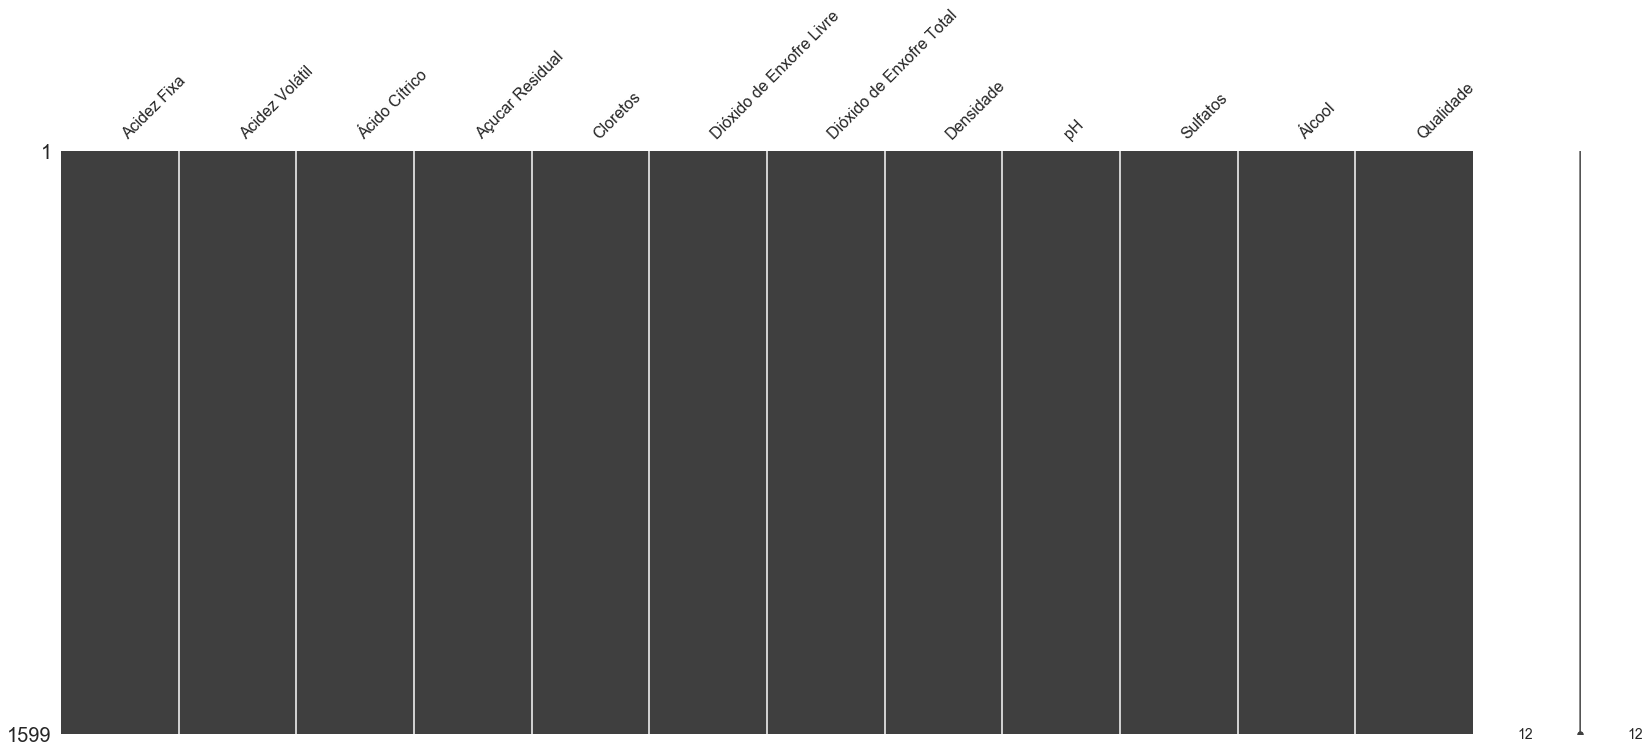

In [55]:
# Exibe visualmente se possui dados nulos ou vazios nas colunas.
msno.matrix(dataset)

Análise das Colunas
=================

### Describe:
* A quantidade de dados por coluna;
* Quantos valores unicos possuímos na coluna;
* Qual o maior valor existente na coluna;
* Qual o menor valor existente na coluna;
* Qual a frequencia da coluna;
* Qual a média dos valores encontrados nas colunas.

In [105]:
dataset.describe()

,Acidez Fixa,Acidez Volátil,Ácido Cítrico,Açucar Residual,Cloretos,Dióxido de Enxofre Livre,Dióxido de Enxofre Total,Densidade,pH,Sulfatos,Álcool,Qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Boxplot:
* Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis . O boxplot tem uma reta (whisker) que estende–se verticalmente ou horizontalmente a partir da caixa, indicando a variabilidade fora do quartil superior e do quartil inferior. Os valores atípicos ou outliers (valores discrepantes) podem ser plotados como pontos individuais. O boxplot não é paramétrico, apresentando a variação em amostras de uma população estatística sem fazer qualquer suposição da distribuição estatística subjacente. Os espaços entre as diferentes partes da caixa indicam o grau de dispersão, a obliquidade nos dados e os outliers. O boxplot também permite estimar visualmente vários estimadores como amplitude interquartil, midhinge, range, mid-range, e trimean. Em resumo, o boxplot identifica onde estão localizados 50% dos valores mais prováveis, a mediana e os valores extremos.

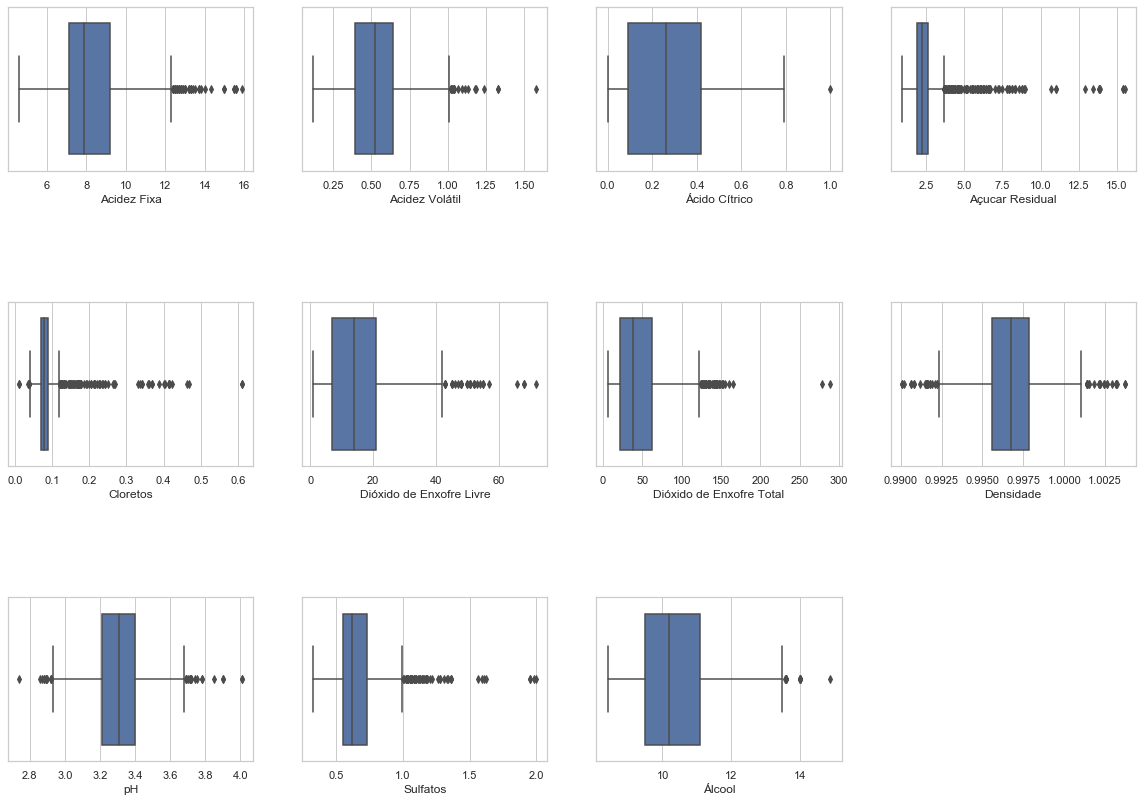

In [100]:
# Exibe um gráfico com os boxplot de cada coluna, onde podemos visualizar seus outliers.
fig = plt.figure()
fig.add_subplot(4, 4, 1)
sns.boxplot(x=dataset['Acidez Fixa'])
fig.add_subplot(4, 4, 2)
sns.boxplot(x=dataset['Acidez Volátil'])
fig.add_subplot(4, 4, 3)
sns.boxplot(x=dataset['Ácido Cítrico'])
fig.add_subplot(4, 4, 4)
sns.boxplot(x=dataset['Açucar Residual'])
fig.add_subplot(4, 4, 5)
sns.boxplot(x=dataset['Cloretos'])
fig.add_subplot(4, 4, 6)
sns.boxplot(x=dataset['Dióxido de Enxofre Livre'])
fig.add_subplot(4, 4, 7)
sns.boxplot(x=dataset['Dióxido de Enxofre Total'])
fig.add_subplot(4, 4, 8)
sns.boxplot(x=dataset['Densidade'])
fig.add_subplot(4, 4, 9)
sns.boxplot(x=dataset['pH'])
fig.add_subplot(4, 4, 10)
sns.boxplot(x=dataset['Sulfatos'])
fig.add_subplot(4, 4, 11)
sns.boxplot(x=dataset['Álcool'])
fig.set_size_inches(18,18)
plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

### Matriz de Correlação:
* A correlação é a medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita. 
* Na última linha podemos observar qual feature é mais importante para que tenhamos um vinho de qualidade, no caso o álcool.

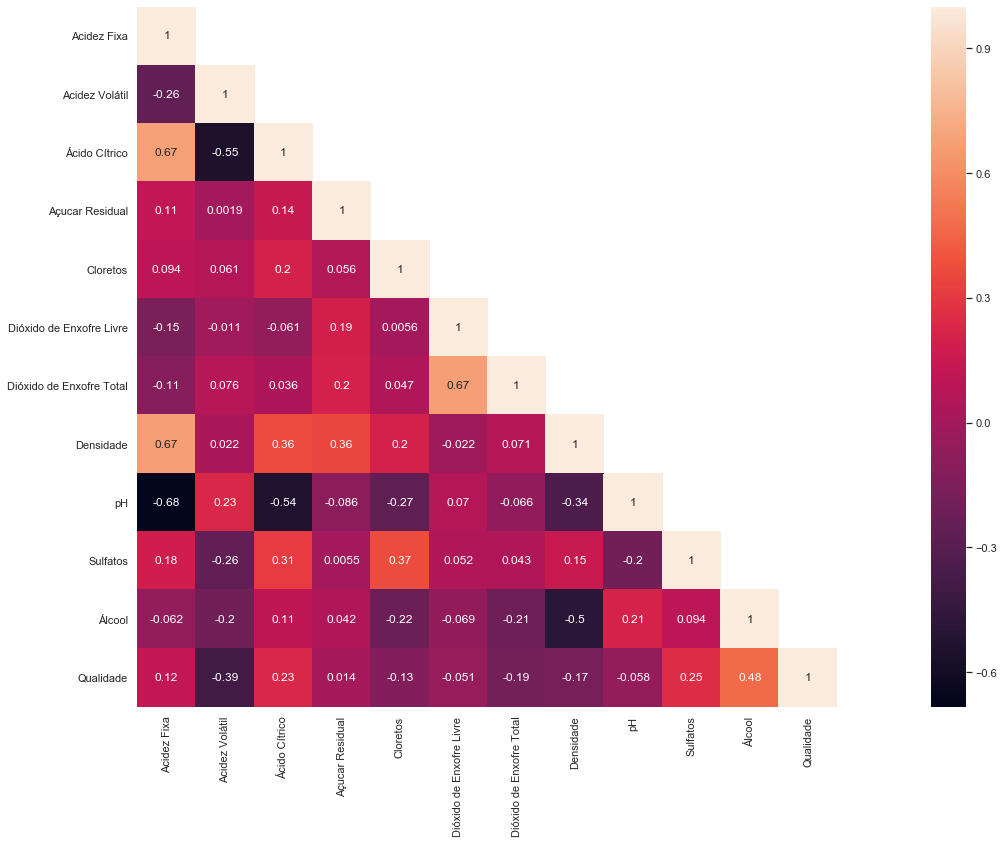

In [104]:
# Exibe a correlação das features.
cor_mat= dataset.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**1) Sobre a Acidez Fixa:**
* Não fornece nenhuma especificação para classificar a qualidade.
* Quanto maior o valor da acidez fixa, maior será o seu ácido cítrico.
* Quanto maior o valor da acidez fixa, maior será a densidade.

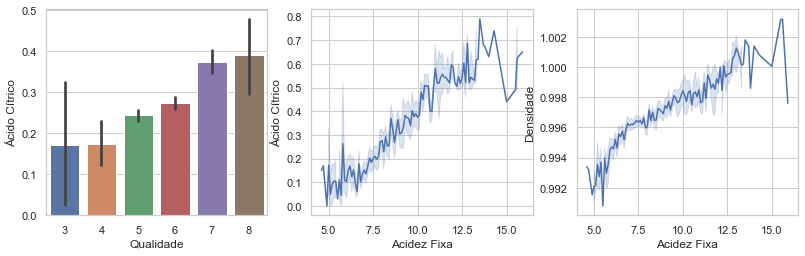

In [86]:
fig = plt.figure()
fig.add_subplot(3, 3, 1)
sns.barplot(x = "Qualidade", y = "Ácido Cítrico", data = dataset)
fig.add_subplot(3, 3, 2)
sns.lineplot(x = "Acidez Fixa", y = "Ácido Cítrico", data = dataset)
fig.add_subplot(3, 3, 3)
sns.lineplot(x = "Acidez Fixa", y = "Densidade", data = dataset)
fig.set_size_inches(12,12)
plt.show()

**2) Sobre a Acidez Volátil:**
* É uma tendência decrescente à medida que aumentamos a qualidade.

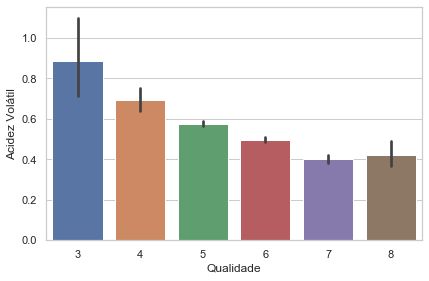

In [60]:
sns.barplot(x = "Qualidade", y = "Acidez Volátil", data = dataset)

**3) Sobre o Ácido Cítrico:**
* A composição do ácido cítrico aumenta à medida que nos elevamos na qualidade do vinho.*
* Quanto mais próximo e 0.8, a acidez fixa tende a aumentar e num intervalo de 0.8 < x < tende a diminuir.*

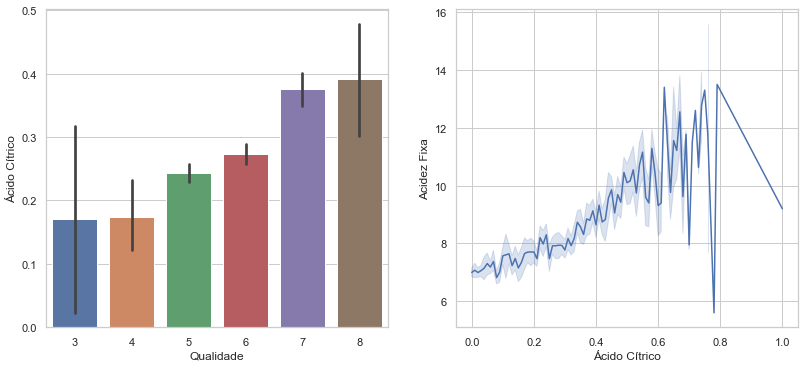

In [109]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
sns.barplot(x = "Qualidade", y = "Ácido Cítrico", data = dataset)
fig.add_subplot(2, 2, 2)
sns.lineplot(x = "Ácido Cítrico", y = "Acidez Fixa", data = dataset)
fig.set_size_inches(12,12)
plt.show()

**4) Sobre o Açucar Residual:**
* Não fornece nenhuma especificação para classificar a qualidade.

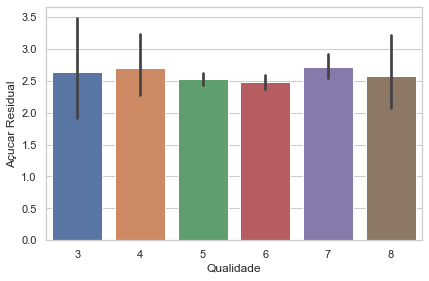

In [28]:
sns.barplot(x = "Qualidade", y = "Açucar Residual", data = dataset)

**5) Sobre o Cloreto:**
* A composição também diminui à medida que aumentamos a qualidade do vinho.

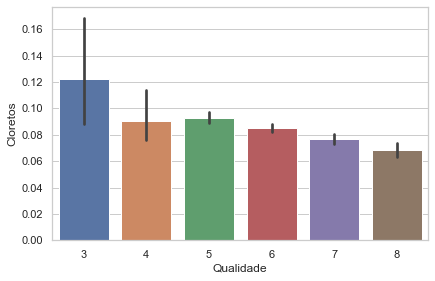

In [30]:
sns.barplot(x = "Qualidade", y = "Cloretos", data = dataset)

**6) Sobre o Dióxido de Enxofre Livre:**
* Não é uma variável significante na qualidade do vinho, porém possue uma forte correlação com o dióxido de enxofre total.

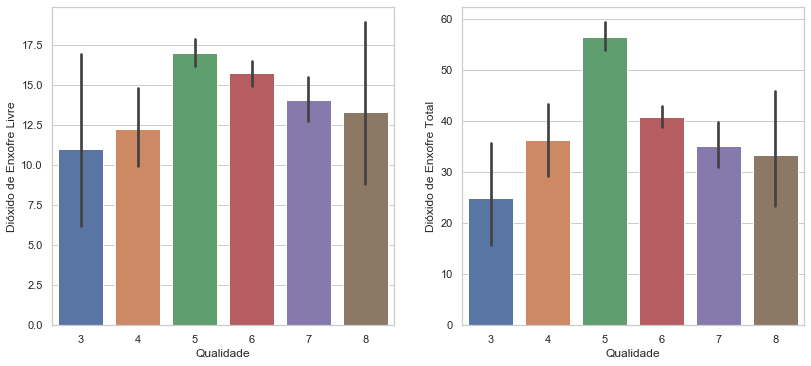

In [118]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
sns.barplot(x = "Qualidade", y = "Dióxido de Enxofre Livre", data = dataset)
fig.add_subplot(2, 2, 2)
sns.barplot(x = "Qualidade", y = "Dióxido de Enxofre Total", data = dataset)
fig.set_size_inches(12,12)
plt.show()

**7) Sobre a Densidade:** 
* O valor da densidade é praticamente constante, o que torna o seu valor dispresível na medida da qualidade.
* Porém a densidade do vinho é proporcional à acidez fixa.

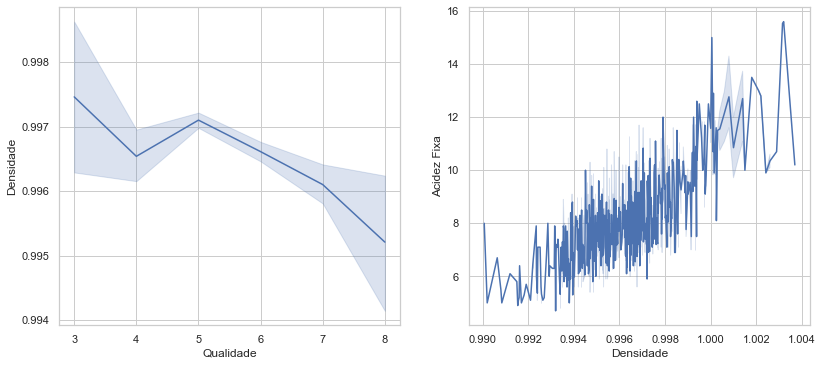

In [117]:
fig = plt.figure()
fig.add_subplot(2, 2, 1)
sns.lineplot(x = "Qualidade", y = "Densidade", data = dataset)
fig.add_subplot(2, 2, 2)
sns.lineplot(x = "Densidade", y = "Acidez Fixa", data = dataset)
fig.set_size_inches(12,12)
plt.show()

**8) Sobre o pH:** 
* Não é uma variável significante na qualidade do vinho.

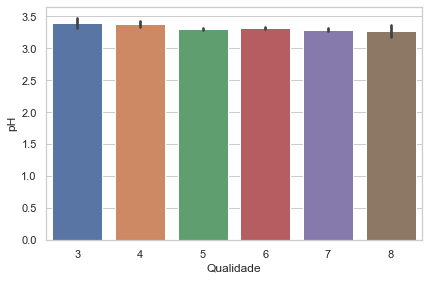

In [111]:
sns.barplot(x = "Qualidade", y = "pH", data = dataset)

**9) Sobre os Sulfatos:** 
* O nível de sulfatos aumenta com a qualidade do vinho.

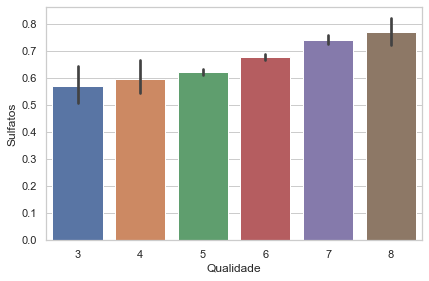

In [115]:
sns.barplot(x = "Qualidade", y = "Sulfatos", data = dataset)

**10) Sobre o Álcool:** 
* Quanto maior o nível do álcool, melhor será a qualidade do vinho.
* É a feature mais importante para definir a qualidade do vinho.

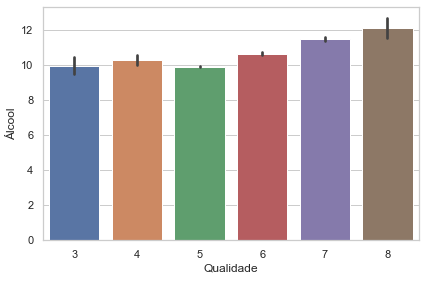

In [119]:
sns.barplot(x = "Qualidade", y = "Álcool", data = dataset)

Prepara os dados para o Machine Learning
===================================

In [207]:
# Agrupa os vinhos em Ruim, Regular ou Bom.
labels = ['Ruim', 'Regular', 'Bom']
dataset['Qualidade'] = pd.cut(dataset['Qualidade'], 3, labels = labels)

In [208]:
label_quality = LabelEncoder()
label_quality.fit(dataset['Qualidade'])

LabelEncoder()

In [209]:
# Listas as classes.
list(label_quality.classes_)

['Bom', 'Regular', 'Ruim']

In [210]:
list(label_quality.inverse_transform([1]))

['Regular']

In [211]:
# Exibe a quantidade de dados por classe.
dataset['Qualidade'].value_counts()

Regular    1319
Bom         217
Ruim         63
Name: Qualidade, dtype: int64

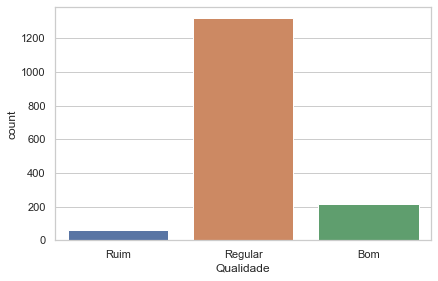

In [181]:
sns.countplot(dataset['Qualidade'])

**Separa as features e o target.**

In [212]:
X = dataset.drop(['Qualidade'], axis=1)
y = dataset['Qualidade']

**Separa as amostras de treino e de teste.**

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Normaliza os dados para performar a acuracy.**

In [214]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Gera uma matriz de resultados comparando a acuracy de cada algoritmo.**

In [270]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(), SGDClassifier(penalty=None), GaussianNB()]
model_names=['Regressão Logística','SVC Linear','SVC RBF','KNN','Random Forest','Árvore de Decisão',
             'Gradient Boosting', 'Stochastic Gradient Decent', 'Gaussian NB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelo':model_names,'Accuracy':acc}

acc_frame=pd.DataFrame(d)
acc_frame.sort_values(['Accuracy'], ascending=False)

,Modelo,Accuracy
3,KNN,0.843750
2,SVC RBF,0.840625
4,Random Forest,0.840625
0,Regressão Logística,0.834375
1,SVC Linear,0.831250
6,Gradient Boosting,0.825000
7,Stochastic Gradient Decent,0.818750
8,Gaussian NB,0.787500
5,Árvore de Decisão,0.768750


EXEMPLOS
=========================

## Algoritmo Support Vector Classifier

In [228]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

**Exibe o resultado do modelo com base na amostra de teste.**

In [241]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         Bom       0.71      0.26      0.37        47
     Regular       0.85      0.98      0.91       262
        Ruim       0.00      0.00      0.00        11

    accuracy                           0.84       320
   macro avg       0.52      0.41      0.43       320
weighted avg       0.80      0.84      0.80       320



**Exibe a matriz de Confusão do modelo.**

In [245]:
print(confusion_matrix(y_test, pred_svc))

[[ 12  35   0]
 [  5 257   0]
 [  0  11   0]]


## Algoritmo Random Forest Classifier.

In [224]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

**Exibe o resultado do modelo com base na amostra de teste.**

In [225]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         Bom       0.63      0.47      0.54        47
     Regular       0.87      0.95      0.91       262
        Ruim       0.00      0.00      0.00        11

    accuracy                           0.85       320
   macro avg       0.50      0.47      0.48       320
weighted avg       0.81      0.85      0.82       320



In [227]:
print(confusion_matrix(y_test, pred_rfc))

[[ 22  25   0]
 [ 13 249   0]
 [  0  11   0]]
